# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


'\n1) Erosion / Dilation:\n    - Load "coins.jpg" from the img folder\n    - Convert the image to binary\n    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image\n    - Use Skimage\'s "binary_erosion" & "binary_dilation" & show the results\n'

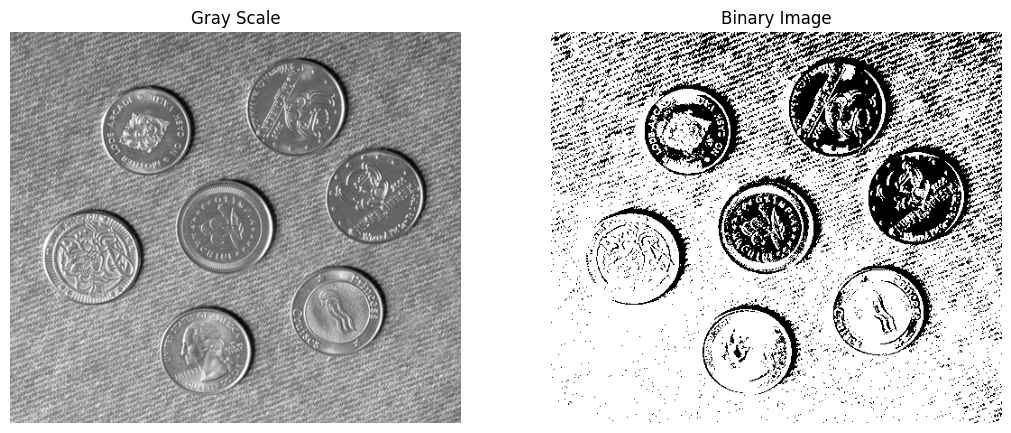

In [3]:
img = io.imread('img/coins.jpg', True)
binary_img = (img > 0.5).astype(np.byte)
show_images([img, binary_img], ['Gray Scale', 'Binary Image'])

In [4]:
def applyMorphologicalOperation(img, mode, size_x, size_y):
    if (mode != 'erosion' and mode != 'dilation'):
        return 'Invalid Type'
    
    res_img  = []
    
    dx = size_x // 2
    dy = size_y // 2

    # img = np.pad(img, (dx, dy), constant_values = 1)

    N = img.shape[0]
    M = img.shape[1]
    
    for i in range(0, N - size_x + 1):
        row = []
        for j in range(0, M - size_y + 1):
            if (mode == 'erosion'):
                row.append((img[i:i + size_x, j:j + size_y]).min())
            else:
                row.append((img[i:i + size_x, j:j + size_y]).max())
        res_img.append(row)
    
    return np.array(res_img)

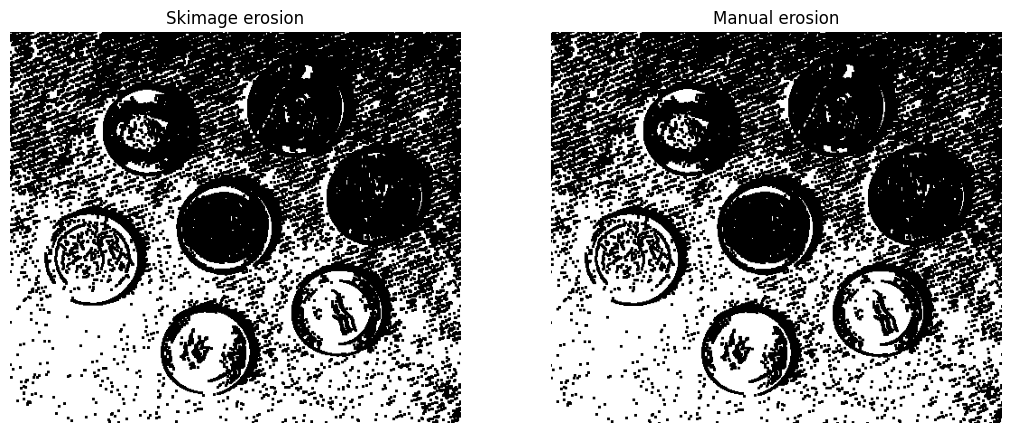

In [5]:
SE = np.ones((3, 3))
Skimage_res = binary_erosion(binary_img, SE)
Manual_res = applyMorphologicalOperation(binary_img, 'erosion', 3, 3)
show_images([Skimage_res, Manual_res], ['Skimage erosion', 'Manual erosion'])

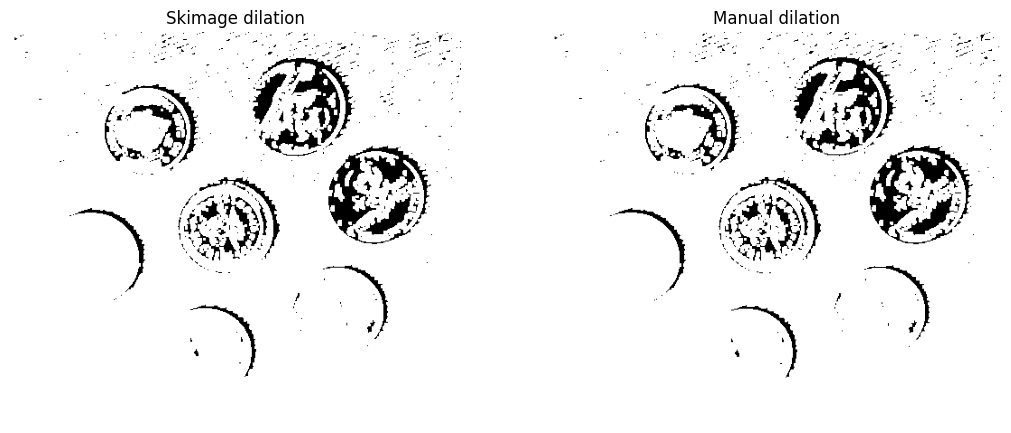

In [6]:
Skimage_res = binary_dilation(binary_img, SE)
Manual_res = applyMorphologicalOperation(binary_img, 'dilation', 3, 3)
show_images([Skimage_res, Manual_res], ['Skimage dilation', 'Manual dilation'])

In [7]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
# for box in bounding_boxes:
    # [Xmin, Xmax, Ymin, Ymax] = box
    # rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    # img_with_boxes[rr, cc] = 1 #set color white

'\n2) Case Study: Credit Card Number Extraction\n    - Load "card.jpg" from the img folder\n    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction\n    - Use your erosion/dilation functions, or Skimage\'s functions only if you didn\'t implement them, to apply closing\n        Note: The goal of this step is to join the card number into 4 sets of connected pixels\n    - Use Skimage\'s "find_contours" to get the bounding boxes for the credit card\'s numbers by filtering on aspect ratio (between 2.5 & 3.5)\n        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:\n                - contour[:,0] being the Y values of the contour perimeter points\n                - contour[:,1] being the X values of the contour perimeter points\n'

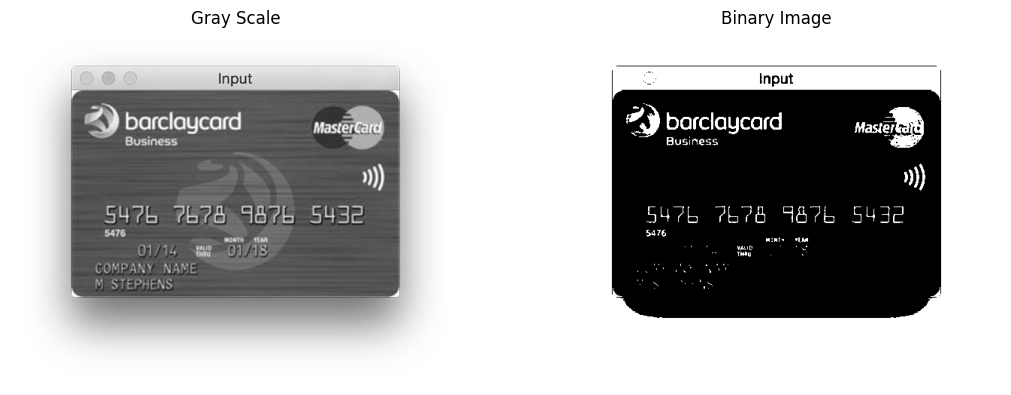

In [8]:
img = io.imread('img/card.jpg', True)
binary_img = (img > 0.7).astype(np.byte)
show_images([img, binary_img], ['Gray Scale', 'Binary Image'])

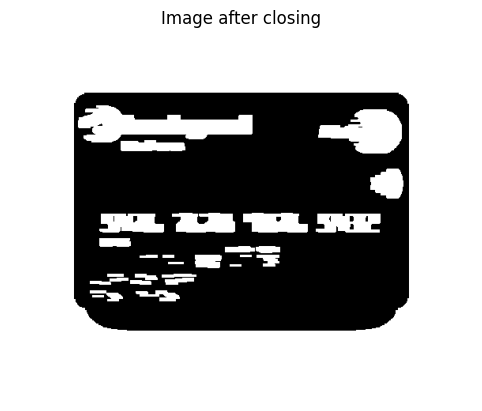

In [9]:
res = applyMorphologicalOperation(binary_img, 'dilation', 2, 8)
res = applyMorphologicalOperation(res, 'dilation', 2, 8)

show_images([res], ['Image after closing'])

In [10]:
contours = find_contours(res, 0.8)

bounding_boxes = [] # Will contain min and max coordinates of each box
for contour in contours:
    x_coordinates = contour[:, 1]
    y_coordinates = contour[:, 0]
    
    x_max = x_coordinates.max()
    x_min = x_coordinates.min()
    
    y_max = y_coordinates.max()
    y_min = y_coordinates.min()
    
    ratio = (x_max - x_min) / (y_max - y_min)
    if (ratio >= 3.1) and (ratio <= 3.5):
        bounding_boxes.append((x_min, x_max, y_min, y_max))

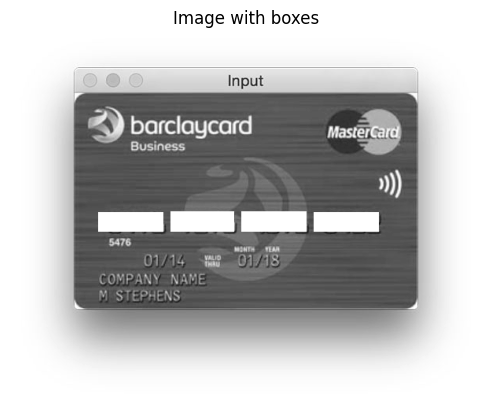

In [11]:
img_with_boxes = img.copy()

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img_with_boxes[rr.astype(int), cc.astype(int)] = 1 #set color white
    
show_images([img_with_boxes], ['Image with boxes'])

In [12]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


'\n3) Skeletonization:\n    - Load "horse.jpg" from the img folder \n    - Use a binary threshold of 0.9 to remove invisible noise in the background\n    - Use Skimage\'s "skeletonize(image)" to acquire the image\'s skeleton & show it\n    - Use Skimage\'s "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it\n'

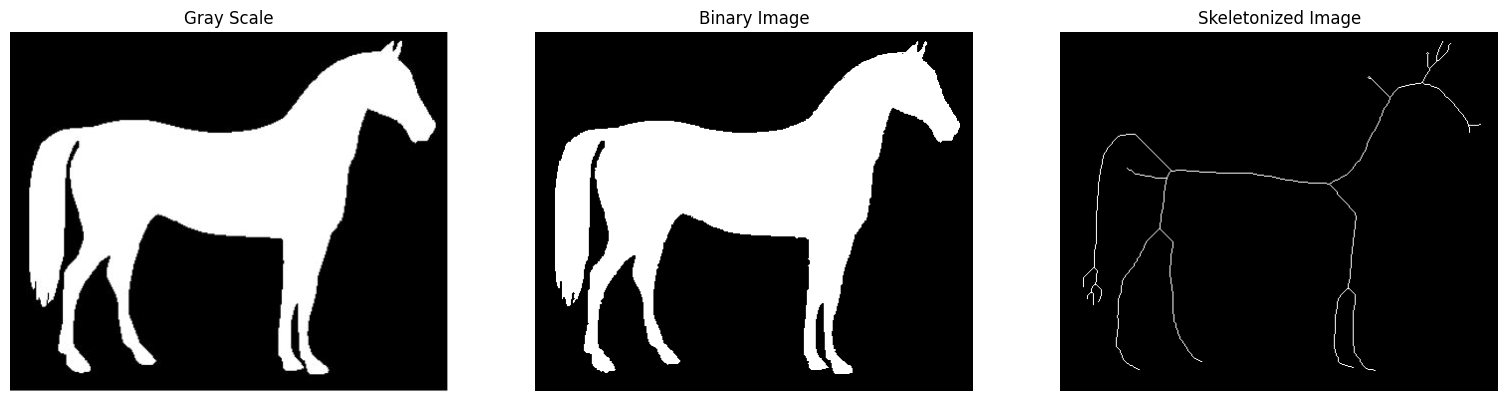

In [13]:
img = io.imread('img/horse.jpg', True)
binary_img = (img > 0.9).astype(np.byte)
skeleton_img = skeletonize(binary_img)
show_images([img, binary_img, skeleton_img], ['Gray Scale', 'Binary Image', 'Skeletonized Image'])

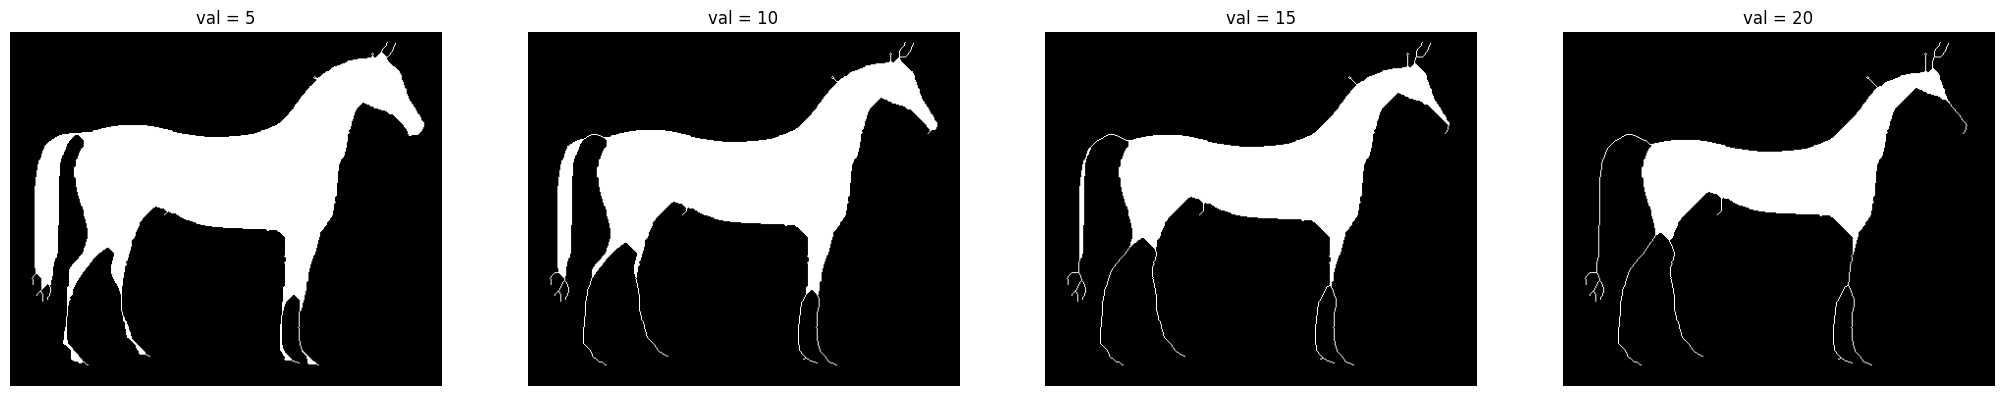

In [17]:
thin_img_5 = thin(binary_img, max_num_iter=5)
thin_img_10 = thin(binary_img, max_num_iter=10)
thin_img_15 = thin(binary_img, max_num_iter=15)
thin_img_20 = thin(binary_img, max_num_iter=20)
show_images([thin_img_5, thin_img_10, thin_img_15, thin_img_20], 
            ['val = 5', 'val = 10', 'val = 15', 'val = 20'])